<a href="https://colab.research.google.com/github/cleziac/Programming-Project/blob/main/ds_programming_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Data Cleaning and Data Wrangling**

In [1]:
# imports 

In [2]:
import numpy as np
import pandas as pd

In [6]:
movies = pd.read_csv('https://raw.githubusercontent.com/cleziac/Programming-Project/main/movies_metadata.csv?token=GHSAT0AAAAAABRE66MX6YGW2DAFZJ3C2AQUYQDWJKA')

In [7]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
# Data exploration 

In [9]:
# How many rows and columns does the dataset have?

print(movies.shape[0])
print(movies.shape[1])

45463
24


In [10]:
# What types of data does the dataset have?

movies.dtypes

adult                       bool
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [11]:
# Let's display the details of the dataset

movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,108359.918813,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,112460.749278,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [12]:
# How many NaN values does each column contain?

print(" \nCount total NaN at each column in a DataFrame : \n\n", movies.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   959
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25052
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64


In [13]:
# Deleting columns that have too many NaN values or that we don't need to perform EDA

movies = movies.drop(['belongs_to_collection', 'homepage', 'tagline', 'poster_path'], 1)
movies = movies.drop(['status', 'video', 'overview', 'popularity'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [14]:
movies.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

**Part 2: Data Cleaning**

In this section, columns from the dataset that are needed to perform EDA (Exploratory Data Anlysis) will be rendered more usable.

In [15]:
# BUDGET COLUMN

print(movies.budget.dtype)
print('The minimum value for a movie budget is: ', movies.budget.min())
print('The maximum value for a movie budget is: ', movies.budget.max())
print('The average value for a movie budget is: ', movies.budget.mean())

pd.to_numeric(movies.budget)

# removing all 0 values (treat them as if they were nan)
budget = movies.budget[movies.budget != 0]
budget.describe

int64
The minimum value for a movie budget is:  0
The maximum value for a movie budget is:  380000000
The average value for a movie budget is:  4224578.813474693


<bound method NDFrame.describe of 0        30000000
1        65000000
3        16000000
5        60000000
6        58000000
           ...   
45399     2000000
45405     2000000
45406      800000
45409     2000000
45419     5000000
Name: budget, Length: 8890, dtype: int64>

In [34]:
# GENRES COLUMN

# The genres column provides data with a dictionary that has two keys: an id and the genre name;
# Some movies have multiple tags (up to 6) and that would make the total > total movies in the dataset;
# For the sake of the EDA, I will keep the first entry of every dict listed. 

genres = movies.genres
genres.head()     # sample

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [109]:
# copying the original column from the dataset into another separate one
genres_col = movies.genres   

# drop nan values
genres_col.dropna()                             

# drop two rows which have values []
genres_col = genres_col.drop([45462, 45461])  

# making a new df to manipulate data with the results of the previous line
df_genres = pd.DataFrame(genres_col)             

# cleaning rows with no pertaining values by taking away rows that do not have the name in them
df_genres = df_genres[df_genres['genres'].str.contains('name', na=False)]     

# make a list of the resulting df
pd.DataFrame(df_genres['genres'].to_list(), columns=['name'])        

# split the string using ',' as a separator to get only the first tag 
df1 = df_genres['genres'].str.split(',', expand = True)          

# deleting all the columns that are not needed
df2 = df1.drop([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], axis = 1) 

# split the string to get only what's after the 'name:' 
df3 = df2[1].str.split(':', expand = True)           

# drop what's left, aka the column containing just 'name'
df3 = df3.drop(0, axis = 1)      

# rename the column from 1 to 'Genres'
df3 = df3.rename(columns= {1 : 'Genres'})        

# convert the datatype to string
df4 = df3['Genres'].astype(str)                                      
df4

# cleaning the string (delete of '' and }])
df5 = df4.str.extract('([a-zA-Z]+)', expand=False).str.split()       
df5

0        [Animation]
1        [Adventure]
2          [Romance]
3           [Comedy]
4           [Comedy]
            ...     
45456      [Science]
45457        [Drama]
45458        [Drama]
45459        [Drama]
45460       [Action]
Name: Genres, Length: 43021, dtype: object

In [111]:
# make a df out of df5 (redundant)
df_genres = pd.DataFrame(df5)

# make a new df that has one column with the genre's names (unique) and the respective counts
genres_df = df5.value_counts().rename_axis('Genres').reset_index(name = 'counts')

# print final DataFrame
genres_df

,Genres,counts
0,[Drama],11966
1,[Comedy],8820
2,[Action],4489
3,[Documentary],3415
4,[Horror],2619
5,[Crime],1685
6,[Thriller],1665
7,[Adventure],1514
8,[Romance],1191
9,[Animation],1124


In [68]:
# ORIGINAL LANGUAGE COLUMN 

In [73]:
movies.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [88]:
# copy the content of the column 'original_language' into a new DataFrame lang
lang = pd.DataFrame(data = movies.original_language)

# delete nan values from rows
lang = lang.dropna()

# added a column 'count' that counts how many movies there are for each language 
lang['count'] = lang.value_counts().sum()

# group by the original language in a new DataFrame
lang1 = lang.groupby('original_language').count()

# idx is a variable that has the indexes (the different languages) as a list
idx = pd.Index.to_list(lang1.index)

# content is a list that contains the count of movies for every language
content = lang1['count'].to_list()

# data is a dictionary that will be used to create the final DataFrame
data = {'languages' : idx, 'counts' : content}

# lang_df is a DataFrame with two columns: language and respective number of movies
lang_df = pd.DataFrame(data = data, index = np.arange(0, 89))
lang_df

,languages,counts
0,ab,10
1,af,2
2,am,2
3,ar,39
4,ay,1
...,...,...
84,vi,10
85,wo,5
86,xx,33
87,zh,409


In [70]:
# REVENUE COLUMN

In [72]:
# revenue is a DataFrame that contains the revenue made by each movie 
revenue = movies.revenue.dropna()
drev = pd.DataFrame(data = revenue)

# most movies had 0.0 as revenue; this value is removed as interpreted like nan 
drev = drev[drev.revenue != 0.0]
drev

,revenue
0,373554033.0
1,262797249.0
3,81452156.0
4,76578911.0
5,187436818.0
...,...
45396,3.0
45398,50656.0
45406,1328612.0
45409,1268793.0


In [89]:
# RELEASE DATES COLUMN

In [106]:
# copy release_date column into a new DataFrame
df = pd.DataFrame(data = movies.release_date)  

# delete rows that contain nan values
df = df.dropna()     

# print column names
df.columns   

# split string using '-' as a separator to get the different years
df[["year", "month", "day"]] = df.release_date.str.split("-", expand = True)    

# group by year and save the result in a DataFrame called mv_per_year
mv_per_year = df.groupby('year').count()             
mv_per_year

,release_date,month,day
year,,,
1874,1,1,1
1878,1,1,1
1883,1,1,1
1887,1,1,1
1888,2,2,2
...,...,...,...
2015,1905,1905,1905
2016,1604,1604,1604
2017,532,532,532


**Part 3: Graphs**

In this section, graphs to explore the data further will be displayed, mostly using the data cleaned in the previous part. 

In order to perform the data visulization, the libraries matplotlib and seaborn will be used. 

In [112]:
# imports 

import matplotlib.pyplot as plt
import seaborn as sns

What is the trend of movie releases? 

How many movies come out each year?

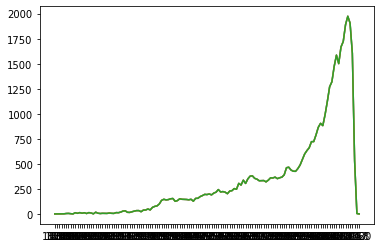

In [113]:
plt.plot(mv_per_year) 

What is the distribution of the movie genres? 

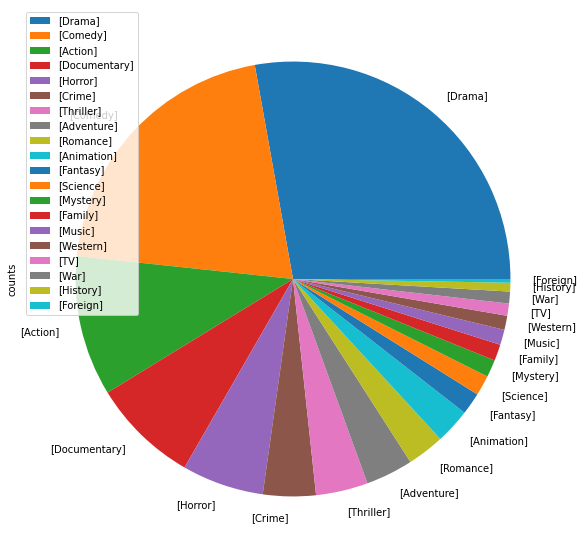

In [128]:
# pie chart with the genres data
pie_genres_df = genres_df.set_index(genres_df.Genres)
plot = pie_genres_df.plot.pie(y='counts', figsize=(10, 10))

How many movies are released in each language?

In [129]:
from matplotlib.pyplot import hist

In [132]:
lang_df

,languages,counts
0,ab,10
1,af,2
2,am,2
3,ar,39
4,ay,1
...,...,...
84,vi,10
85,wo,5
86,xx,33
87,zh,409


In [151]:
# For the sake of the analysis and the better comprehension of the graph, 
# only languages with an occurence in movies >= 100 will be displayed. 

lang_df_mask = lang_df[lang_df['counts'] >= 100]
lang_df_mask.shape

(23, 2)

(array([  313.,   130.,   225.,  1080.,   113., 32269.,   994.,   101.,
          297.,  2438.,   508.,   100.,  1529.,  1350.,   444.,   248.,
          106.,   219.,   316.,   826.,   384.,   150.,   409.]),
 array([ 0.        ,  0.95652174,  1.91304348,  2.86956522,  3.82608696,
         4.7826087 ,  5.73913043,  6.69565217,  7.65217391,  8.60869565,
         9.56521739, 10.52173913, 11.47826087, 12.43478261, 13.39130435,
        14.34782609, 15.30434783, 16.26086957, 17.2173913 , 18.17391304,
        19.13043478, 20.08695652, 21.04347826, 22.        ]),
 <a list of 23 Patch objects>)

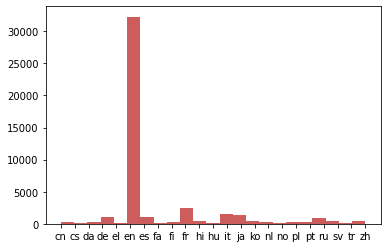

In [166]:
hist(lang_df_mask.languages, weights=lang_df_mask.counts, 
     orientation = 'vertical', label = lang_df_mask.languages, bins = 23,
     color = 'indianred')

Is there a relation between the movie genre and the revenue?